forked from https://www.kaggle.com/code/siddhvr/cafa5-using-protbert-embeds

just to be noted:

- this is the same notebook which was submitted in CAFA5 for demonstration purpose (not much changes have been made)
- it utilizes Protbert model finetuned on CAFA5 dataset (try training the model on CAFA6)
- submission utilizes ensemble for cafa5 notebook (scroll all the way down to check)



In [1]:
!pip install "numpy<2.0"
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.0 MB/s eta 0:00:00
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.0%2Bcu121-cp312-cp312-linux_x86_64.whl (757.2 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.0%2Bcu121-cp312-cp312-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.2.0%2Bcu121-cp312-cp312-linux_x86_64.whl (3.4 MB)
  Using cached torchmetrics-1.8.2-py3-none-any.whl.metadata (22 kB)
  Using cached pytorch_lightning-2.6.0-py3-none-any.whl.metadata (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.8 MB/s eta 0:00:00
Using cached torchmetrics-1.8.2

In [26]:
!unzip -q /content/cafa-6-protein-function-prediction.zip -d /content/cafa-6-protein-function-prediction

replace /content/cafa-6-protein-function-prediction/IA.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Test/testsuperset-taxon-list.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Test/testsuperset.fasta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Train/go-basic.obo? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Train/train_sequences.fasta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Train/train_taxonomy.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/Train/train_terms.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/cafa-6-protein-function-prediction/sample_submission.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [27]:
!unzip -q /content/embeddings.zip -d /content/embeddings

replace /content/embeddings/train/sp_P14439_HA23_MOUSE.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_Q6UPE1_ETFD_RAT.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_Q93ZE2_TGA7_ARATH.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_O60259_KLK8_HUMAN.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_P25340_ERG4_YEAST.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_Q04005_LIC4_YEAST.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_P06242_KIN28_YEAST.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_Q07684_MFG1_YEAST.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_Q6P7D5_M1IP1_RAT.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/embeddings/train/sp_P14484_CUPP_DROME.npz? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
re

In [2]:
import pandas as pd
sub = pd.read_csv("cafa-6-protein-function-prediction/sample_submission.tsv", sep= "\t", on_bad_lines='skip', header = None)
sub.columns = ["The Protein ID", "The Gene Ontology term (GO) ID", "Predicted link probability that GO appear in Protein"]
sub.head(5)

,The Protein ID,The Gene Ontology term (GO) ID,Predicted link probability that GO appear in Protein
0,A0A0C5B5G6,GO:0000001,0.123
1,A0A0C5B5G6,GO:0000002,0.456
2,A0A1B0GTW7,GO:0000001,0.123
3,A0A1B0GTW7,GO:0000002,0.456
4,A0JNW5,GO:0000001,0.123


In [3]:
MAIN_DIR = "cafa-6-protein-function-prediction"

# UTILITARIES
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# TORCH MODULES FOR METRICS COMPUTATION :
import torch
from torch.utils.data import Dataset
from torch import nn
from torch.utils.data import random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.classification import MultilabelF1Score
from torchmetrics.classification import MultilabelAccuracy

import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

# WANDB FOR LIGHTNING :
import wandb

# FILES VISUALIZATION
import os
print(f"Listing files in {MAIN_DIR}:")
for dirname, _, filenames in os.walk(MAIN_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Listing files in cafa-6-protein-function-prediction:
cafa-6-protein-function-prediction/sample_submission.tsv
cafa-6-protein-function-prediction/IA.tsv
cafa-6-protein-function-prediction/Train/train_sequences.fasta
cafa-6-protein-function-prediction/Train/go-basic.obo
cafa-6-protein-function-prediction/Train/train_terms.tsv
cafa-6-protein-function-prediction/Train/train_taxonomy.tsv
cafa-6-protein-function-prediction/Test/testsuperset-taxon-list.tsv
cafa-6-protein-function-prediction/Test/testsuperset.fasta


In [20]:
class config:
    train_sequences_path = MAIN_DIR  + "/Train/train_sequences.fasta"
    train_labels_path = MAIN_DIR + "/Train/train_terms.tsv"
    test_sequences_path = MAIN_DIR + "/Test/testsuperset.fasta"

    num_labels = 500
    n_epochs = 8
    batch_size = 128
    lr = 0.01

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
print(config.device)
# import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


cpu
False
0
No GPU


In [22]:
# Directories for the different embedding vectors :
embeds_map = {
    "T5" : "t5embeds",
    "ProtBERT" : "protbert-embeddings-for-cafa5",
    "EMS2" : "cafa-5-ems-2-embeddings-numpy"
}

# Length of the different embedding vectors :
embeds_dim = {
    "T5" : 1024,
    "ProtBERT" : 1024,
    "EMS2" : 1280
}

In [23]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
import os

class ProteinSequenceDataset(Dataset):

    def __init__(self, datatype, embeddings_source):
        super(ProteinSequenceDataset).__init__()
        self.datatype = datatype

        # Base path for embeddings in Colab
        base_path = "/content/embeddings"

        # Determine file names
        if embeddings_source == "T5":
            embed_file = f"{datatype}_embeds.npy"
        else:
            embed_file = f"{datatype}_embeddings.npy"

        id_file = f"{datatype}_ids.npy"

        # Logic to find files: check direct path, then subfolder defined in embeds_map
        paths_to_check = [
            os.path.join(base_path, embed_file),
            os.path.join(base_path, embeds_map.get(embeddings_source, ""), embed_file),
            "/kaggle/input/"+embeds_map.get(embeddings_source, "")+"/"+embed_file # Fallback to original
        ]

        found = False
        for p in paths_to_check:
            if os.path.exists(p):
                embeds = np.load(p)
                # Assume ids file is in the same directory
                ids_p = p.replace(embed_file, id_file)
                ids = np.load(ids_p)
                found = True
                print(f"Loaded embeddings from {p}")
                break

        if not found:
            # Fallback to original logic just in case, though it will likely fail in Colab
             if embeddings_source in ["ProtBERT", "EMS2"]:
                embeds = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_embeddings.npy")
                ids = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_ids.npy")
             if embeddings_source == "T5":
                embeds = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_embeds.npy")
                ids = np.load("/kaggle/input/"+embeds_map[embeddings_source]+"/"+datatype+"_ids.npy")

        embeds_list = []
        for l in range(embeds.shape[0]):
            embeds_list.append(embeds[l,:])
        self.df = pd.DataFrame(data={"EntryID": ids, "embed" : embeds_list})

        if datatype=="train":
            # Try to find targets file
            target_file = "train_targets_top"+str(config.num_labels)+".npy"
            target_paths = [
                os.path.join(base_path, target_file),
                os.path.join(base_path, embeds_map.get(embeddings_source, ""), target_file),
                "/kaggle/input/train-targets-top"+str(config.num_labels)+ "/"+target_file
            ]

            labels_found = False
            for p in target_paths:
                if os.path.exists(p):
                    np_labels = np.load(p)
                    labels_found = True
                    break

            if not labels_found:
                # Original path fallback
                np_labels = np.load(
                "/kaggle/input/train-targets-top"+str(config.num_labels)+ \
                "/train_targets_top"+str(config.num_labels)+".npy")

            df_labels = pd.DataFrame(self.df['EntryID'])
            df_labels['labels_vect']=[row for row in np_labels]
            self.df = self.df.merge(df_labels, on="EntryID")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        embed = torch.tensor(self.df.iloc[index]["embed"] , dtype = torch.float32)
        if self.datatype=="train":
            targets = torch.tensor(self.df.iloc[index]["labels_vect"], dtype = torch.float32)
            return embed, targets
        if self.datatype=="test":
            id = self.df.iloc[index]["EntryID"]
            return embed, id

## MODEL ARCHITECTURE BUILDING AND TRAINING

In [24]:
class MultiLayerPerceptron(torch.nn.Module):

    def __init__(self, input_dim, num_classes):
        super(MultiLayerPerceptron, self).__init__()

        self.linear1 = torch.nn.Linear(input_dim, 864)
        self.activation1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(864, 712)
        self.activation2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(712, num_classes)


    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.linear3(x)
        return x

In [25]:
class CNN1D(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CNN1D, self).__init__()
        # (batch_size, channels, embed_size)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=3, kernel_size=3, dilation=1, padding=1, stride=1)
        # (batch_size, 3, embed_size)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        # (batch_size, 3, embed_size/2 = 512)
        self.conv2 = nn.Conv1d(in_channels=3, out_channels=8, kernel_size=3, dilation=1, padding=1, stride=1)
        # (batch_size, 8, embed_size/2 = 512)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        # (batch_size, 8, embed_size/4 = 256)
        self.fc1 = nn.Linear(in_features=int(8 * input_dim/4), out_features=864)
        self.fc2 = nn.Linear(in_features=864, out_features=num_classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], 1, x.shape[1])
        x = self.pool1(nn.functional.tanh(self.conv1(x)))
        x = self.pool2(nn.functional.tanh(self.conv2(x)))
        x = torch.flattenF(x, 1)
        x = nn.functional.tanh(self.fc1(x))
        x = self.fc2(x)
        return x


In [26]:
def train_model(embeddings_source, model_type="linear", train_size=0.9):

    train_dataset = ProteinSequenceDataset(datatype="train", embeddings_source = embeddings_source)

    train_set, val_set = random_split(train_dataset, lengths = [int(len(train_dataset)*train_size), len(train_dataset)-int(len(train_dataset)*train_size)])
    train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=config.batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val_set, batch_size=config.batch_size, shuffle=True)

    if model_type == "linear":
        model = MultiLayerPerceptron(input_dim=embeds_dim[embeddings_source], num_classes=config.num_labels).to(config.device)
    if model_type == "convolutional":
        model = CNN1D(input_dim=embeds_dim[embeddings_source], num_classes=config.num_labels).to(config.device)

    optimizer = torch.optim.Adam(model.parameters(), lr = config.lr)
    scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience=1)
    CrossEntropy = torch.nn.CrossEntropyLoss()
    f1_score = MultilabelF1Score(num_labels=config.num_labels).to(config.device)
    n_epochs = config.n_epochs

    print("BEGIN TRAINING...")
    train_loss_history=[]
    val_loss_history=[]

    train_f1score_history=[]
    val_f1score_history=[]
    for epoch in range(n_epochs):
        print("EPOCH ", epoch+1)
        ## TRAIN PHASE :
        losses = []
        scores = []
        for embed, targets in tqdm(train_dataloader):
            embed, targets = embed.to(config.device), targets.to(config.device)
            optimizer.zero_grad()
            preds = model(embed)
            loss= CrossEntropy(preds, targets)
            score=f1_score(preds, targets)
            losses.append(loss.item())
            scores.append(score.item())
            loss.backward()
            optimizer.step()
        avg_loss = np.mean(losses)
        avg_score = np.mean(scores)
        print("Running Average TRAIN Loss : ", avg_loss)
        print("Running Average TRAIN F1-Score : ", avg_score)
        train_loss_history.append(avg_loss)
        train_f1score_history.append(avg_score)

        ## VALIDATION PHASE :
        losses = []
        scores = []
        for embed, targets in val_dataloader:
            embed, targets = embed.to(config.device), targets.to(config.device)
            preds = model(embed)
            loss= CrossEntropy(preds, targets)
            score=f1_score(preds, targets)
            losses.append(loss.item())
            scores.append(score.item())
        avg_loss = np.mean(losses)
        avg_score = np.mean(scores)
        print("Running Average VAL Loss : ", avg_loss)
        print("Running Average VAL F1-Score : ", avg_score)
        val_loss_history.append(avg_loss)
        val_f1score_history.append(avg_score)

        scheduler.step(avg_loss)
        print("\n")

    print("TRAINING FINISHED")
    print("FINAL TRAINING SCORE : ", train_f1score_history[-1])
    print("FINAL VALIDATION SCORE : ", val_f1score_history[-1])

    losses_history = {"train" : train_loss_history, "val" : val_loss_history}
    scores_history = {"train" : train_f1score_history, "val" : val_f1score_history}

    return model, losses_history, scores_history

In [27]:
import os
import numpy as np
from tqdm import tqdm

def convert_npz_to_npy(source_dir, output_name_prefix):
    # Handle case sensitivity or missing directories gracefully
    if not os.path.exists(source_dir):
        print(f"Directory {source_dir} not found. Checking for case-sensitive alternatives...")
        parent = os.path.dirname(source_dir)
        base = os.path.basename(source_dir)
        if os.path.exists(parent):
            for name in os.listdir(parent):
                if name.lower() == base.lower():
                    source_dir = os.path.join(parent, name)
                    print(f"Found directory: {source_dir}")
                    break

    if not os.path.exists(source_dir):
        print(f"Directory {source_dir} still not found. Skipping conversion for {output_name_prefix}.")
        return

    files = [f for f in os.listdir(source_dir) if f.endswith('.npz')]
    if not files:
        print(f"No .npz files found in {source_dir}.")
        return

    print(f"Processing {len(files)} files from {source_dir} for {output_name_prefix}...")

    embeddings = []
    ids = []

    # Iterate over files to extract ID and Embedding
    for filename in tqdm(files):
        # Assumption: Filename format is 'sp_ID_...npz' or similar.
        # We extract the ID, usually the second part if separated by underscores.
        parts = filename.split('_')
        if len(parts) > 1:
            # Heuristic: take the second element as ID (e.g. sp_A123_... -> A123)
            obj_id = parts[1]
        else:
            obj_id = filename.replace('.npz', '')

        file_path = os.path.join(source_dir, filename)
        try:
            with np.load(file_path) as data:
                # Robust extraction of embedding from .npz
                if 'mean_representations' in data:
                    val = data['mean_representations']
                    if val.dtype == 'O' and val.shape == (): # Handle 0-d array wrapping dict
                         val = val.item()

                    if isinstance(val, dict):
                         emb = list(val.values())[0]
                    else:
                         emb = val
                elif 'embedding' in data:
                    emb = data['embedding']
                elif 'arr_0' in data:
                    emb = data['arr_0']
                else:
                    # Fallback: take the first array found
                    key = list(data.keys())[0]
                    emb = data[key]

                embeddings.append(emb)
                ids.append(obj_id)
        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Save the aggregated arrays
    if embeddings:
        embeddings_array = np.array(embeddings)
        ids_array = np.array(ids)

        print(f"Generated {output_name_prefix} embeddings shape: {embeddings_array.shape}")

        output_dir = "/content/embeddings"
        os.makedirs(output_dir, exist_ok=True)

        np.save(os.path.join(output_dir, f"{output_name_prefix}_embeddings.npy"), embeddings_array)
        np.save(os.path.join(output_dir, f"{output_name_prefix}_ids.npy"), ids_array)
        print(f"Successfully created {output_name_prefix}_embeddings.npy and {output_name_prefix}_ids.npy in {output_dir}")
    else:
        print(f"No valid embeddings extracted for {output_name_prefix}.")

# Run conversion for train and test sets
# Corrected paths based on unzip output
convert_npz_to_npy('/content/embeddings/train', 'train')
convert_npz_to_npy('/content/embeddings/test', 'test')

Processing 82404 files from /content/embeddings/train for train...


100%|██████████| 82404/82404 [00:41<00:00, 1993.69it/s]


Generated train embeddings shape: (82404, 1280)
Successfully created train_embeddings.npy and train_ids.npy in /content/embeddings
Directory /content/embeddings/test not found. Checking for case-sensitive alternatives...
Directory /content/embeddings/test still not found. Skipping conversion for test.


In [28]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def generate_targets(num_labels=500):
    print("Generating targets...")
    ids_path = "/content/embeddings/train_ids.npy"

    if not os.path.exists(ids_path):
        print("train_ids.npy not found. Please run the embedding conversion cell first.")
        return

    # Load IDs from the embeddings we just processed
    ids = np.load(ids_path)

    # Load the raw training terms
    # Ensure the path matches your config
    terms_path = config.train_labels_path
    print(f"Loading terms from {terms_path}...")
    terms_df = pd.read_csv(terms_path, sep="\t")

    # Identify the top N terms
    print(f"Identifying top {num_labels} terms...")
    top_terms = terms_df.groupby("term")["EntryID"].count().sort_values(ascending=False).head(num_labels).index.tolist()
    term_to_idx = {term: i for i, term in enumerate(top_terms)}

    # Filter dataset to only relevant terms
    terms_df = terms_df[terms_df['term'].isin(top_terms)]

    # Map EntryID to a set of term indices for fast lookup
    print("Mapping IDs to terms...")
    id_to_terms = terms_df.groupby('EntryID')['term'].apply(lambda x: set(map(term_to_idx.get, x))).to_dict()

    # Create the target matrix (Proteins x Top_Labels)
    targets = np.zeros((len(ids), num_labels), dtype=np.float32)

    print("Constructing target matrix...")
    for i, entry_id in tqdm(enumerate(ids), total=len(ids)):
        if entry_id in id_to_terms:
            for term_idx in id_to_terms[entry_id]:
                targets[i, term_idx] = 1.0

    # Save the file in the expected location
    save_path = "/content/embeddings/train_targets_top"+str(num_labels)+".npy"
    np.save(save_path, targets)
    print(f"Successfully saved targets to {save_path}")

# Generate the missing target file
generate_targets(config.num_labels)

Generating targets...
Loading terms from cafa-6-protein-function-prediction/Train/train_terms.tsv...
Identifying top 500 terms...
Mapping IDs to terms...
Constructing target matrix...


100%|██████████| 82404/82404 [00:00<00:00, 387152.65it/s]


Successfully saved targets to /content/embeddings/train_targets_top500.npy


In [29]:
#ems2_model, ems2_losses, ems2_scores = train_model(embeddings_source="EMS2",model_type="convolutional")

In [30]:
#t5_model, t5_losses, t5_scores = train_model(embeddings_source="T5",model_type="linear")

In [31]:
# The uploaded embeddings have dimension 1280, but ProtBERT config expects 1024.
# Update the dimension map to match your data.
embeds_dim["ProtBERT"] = 1280

protbert_model, protbert_losses, protbert_scores = train_model(embeddings_source="ProtBERT",model_type="linear")

Loaded embeddings from /content/embeddings/train_embeddings.npy
BEGIN TRAINING...
EPOCH  1


100%|██████████| 580/580 [00:42<00:00, 13.60it/s]


Running Average TRAIN Loss :  14.50662023281229
Running Average TRAIN F1-Score :  0.03230423752041855
Running Average VAL Loss :  13.922980029766377
Running Average VAL F1-Score :  0.044365364914903276


EPOCH  2


100%|██████████| 580/580 [01:03<00:00,  9.12it/s]


Running Average TRAIN Loss :  13.60423811550798
Running Average TRAIN F1-Score :  0.04854892606622186
Running Average VAL Loss :  13.528439639164851
Running Average VAL F1-Score :  0.04843457908584521


EPOCH  3


100%|██████████| 580/580 [01:06<00:00,  8.76it/s]


Running Average TRAIN Loss :  13.391572906231058
Running Average TRAIN F1-Score :  0.051773943758473315
Running Average VAL Loss :  13.466940028850848
Running Average VAL F1-Score :  0.050543011381075933


EPOCH  4


100%|██████████| 580/580 [01:08<00:00,  8.52it/s]


Running Average TRAIN Loss :  13.264914522499874
Running Average TRAIN F1-Score :  0.05324007620200001
Running Average VAL Loss :  13.362356684758113
Running Average VAL F1-Score :  0.05138748007325026


EPOCH  5


100%|██████████| 580/580 [01:05<00:00,  8.86it/s]


Running Average TRAIN Loss :  13.152184833329299
Running Average TRAIN F1-Score :  0.054486174653444824
Running Average VAL Loss :  13.305160493117112
Running Average VAL F1-Score :  0.051909050001547885


EPOCH  6


100%|██████████| 580/580 [01:12<00:00,  7.98it/s]


Running Average TRAIN Loss :  13.091308652943578
Running Average TRAIN F1-Score :  0.0548939850117112
Running Average VAL Loss :  13.30788946885329
Running Average VAL F1-Score :  0.05225179393130999


EPOCH  7


100%|██████████| 580/580 [01:04<00:00,  9.06it/s]


Running Average TRAIN Loss :  13.039053971191933
Running Average TRAIN F1-Score :  0.055458953154498135
Running Average VAL Loss :  13.293303020183856
Running Average VAL F1-Score :  0.0525762215256691


EPOCH  8


100%|██████████| 580/580 [01:01<00:00,  9.42it/s]


Running Average TRAIN Loss :  12.990942775792089
Running Average TRAIN F1-Score :  0.05628049523922904
Running Average VAL Loss :  13.31870558812068
Running Average VAL F1-Score :  0.05157904814069088


TRAINING FINISHED
FINAL TRAINING SCORE :  0.05628049523922904
FINAL VALIDATION SCORE :  0.05157904814069088


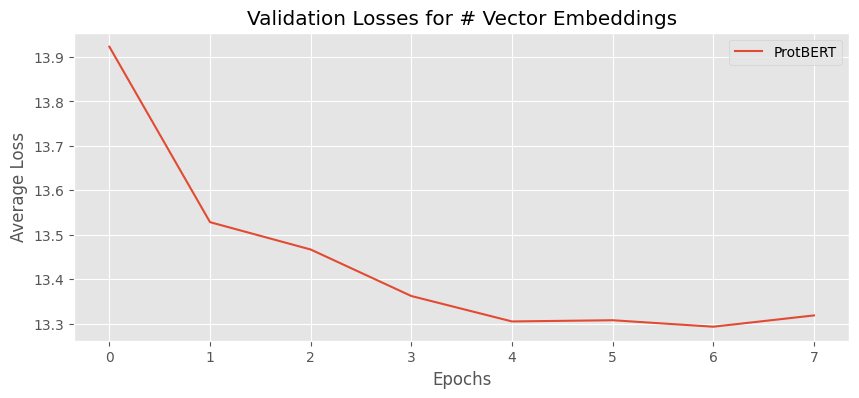

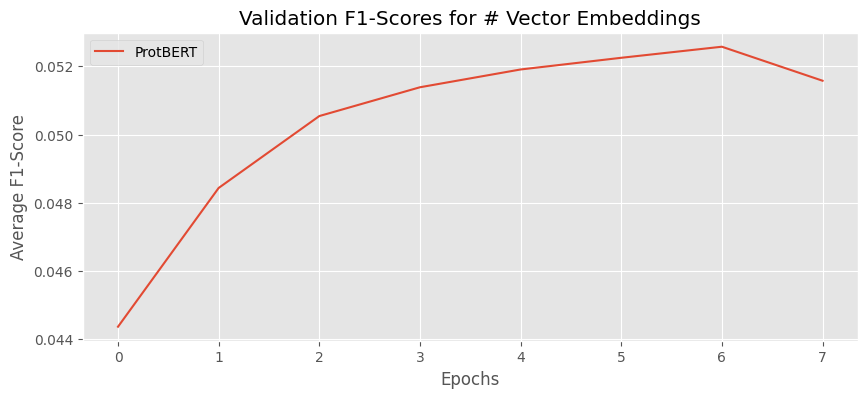

In [32]:
plt.figure(figsize = (10, 4))
#plt.plot(ems2_losses["val"], label = "EMS2")
#plt.plot(t5_losses["val"], label = "T5")
plt.plot(protbert_losses["val"], label = "ProtBERT")
plt.title("Validation Losses for # Vector Embeddings")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.show()

plt.figure(figsize = (10, 4))
#plt.plot(ems2_scores["val"], label = "EMS2")
#plt.plot(t5_scores["val"], label = "T5")
plt.plot(protbert_scores["val"], label = "ProtBERT")
plt.title("Validation F1-Scores for # Vector Embeddings")
plt.xlabel("Epochs")
plt.ylabel("Average F1-Score")
plt.legend()
plt.show()

## PREDICTION

In [43]:
def predict(embeddings_source):

    test_dataset = ProteinSequenceDataset(datatype="test", embeddings_source = embeddings_source)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

    if embeddings_source == "T5":
        model = t5_model
    if embeddings_source == "ProtBERT":
        model = protbert_model
    if embeddings_source == "EMS2":
        model = ems2_model

    model.eval()

    labels = pd.read_csv(config.train_labels_path, sep = "\t")
    top_terms = labels.groupby("term")["EntryID"].count().sort_values(ascending=False)
    labels_names = top_terms[:config.num_labels].index.values
    print("GENERATE PREDICTION FOR TEST SET...")

    ids_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=object)
    go_terms_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=object)
    confs_ = np.empty(shape=(len(test_dataloader)*config.num_labels,), dtype=np.float32)

    for i, (embed, id) in tqdm(enumerate(test_dataloader)):
        embed = embed.to(config.device)
        confs_[i*config.num_labels:(i+1)*config.num_labels] = torch.nn.functional.sigmoid(model(embed)).squeeze().detach().cpu().tolist()
        ids_[i*config.num_labels:(i+1)*config.num_labels] = id[0]
        go_terms_[i*config.num_labels:(i+1)*config.num_labels] = labels_names

    submission_df = pd.DataFrame(data={"Id" : ids_, "GO term" : go_terms_, "Confidence" : confs_})
    print("PREDICTIONS DONE")
    return submission_df


In [44]:
submission_df = predict("ProtBERT")

Loaded embeddings from /content/embeddings/train_embeddings.npy
GENERATE PREDICTION FOR TEST SET...


82404it [01:40, 818.58it/s]


PREDICTIONS DONE


In [45]:
len(submission_df)

41202000

<h4> SUBMISSION</h4>
You may submit this file as is.

In [46]:
#submission_df.to_csv('submission.tsv', sep='\t', header=False, index=False)

<h4> or ensemble with some other public submission

In [47]:
# Load the user's submission file with standard column names
submission2 = pd.read_csv('/content/submission2.tsv',
    sep='\t', header=None, names=['Id', 'GO term', 'Confidence'])

In [48]:
# Merge the external submission with the model predictions
# using suffixes to distinguish between the two sources
submissions = submission2.merge(submission_df, on=['Id', 'GO term'], how='outer', suffixes=('_ext', '_pred'))

In [ ]:
# Combine predictions. Logic: Use external confidence if available, otherwise use model prediction.
submissions['confidence_combined'] = submissions.apply(
    lambda row: row['Confidence_ext'] if not np.isnan(row['Confidence_ext']) else row['Confidence_pred'],
    axis=1
)

In [ ]:
# Save the combined submission
submissions[['Id', 'GO term', 'confidence_combined']].to_csv('submission.tsv', sep='\t', header=False, index=False)